### Theory Integration

We mapped constucts across a collection of behaviour change theories to ontologies in order to determine commonalities and show how these theories can be integrated. 

Here we parse the theory mapping and quantitatively analyse the results. 

In [41]:
! pip install openpyxl
! pip install pandas
! pip install py_horned_owl
! pip install whoosh
! pip install ontoutils
! pip install seaborn

  Using cached argparse-1.4.0-py2.py3-none-any.whl.metadata (2.8 kB)
Using cached argparse-1.4.0-py2.py3-none-any.whl (23 kB)
  Using cached contourpy-1.2.1-cp312-cp312-macosx_11_0_arm64.whl.metadata (5.8 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.5-cp312-cp312-macosx_11_0_arm64.whl.metadata (6.4 kB)
  Using cached pyparsing-3.1.2-py3-none-any.whl.metadata (5.1 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 35.1 MB/s eta 0:00:00a 0:00:01
Using cached contourpy-1.2.1-cp312-cp312-macosx_11_0_arm64.whl (245 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 31.3 MB/s eta 0:00:00
Using cached kiwisolver-1.4.5-cp312-cp312-macosx_11_0_arm64.whl (64 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 19.3 MB/s eta 0:00:00
Using cached pyparsing-3.1.2-py3-none-any.whl (103 kB)


In [1]:
import openpyxl
import pandas as pd

def parseConstructs(constructs_file):
    row_data = []
    num = 0
    wb = openpyxl.load_workbook(constructs_file, data_only=True)
    sheet = wb['Sheet1']
    for row in sheet.iter_rows(min_row=2, min_col=0, max_row=1466, max_col=16):
        theory_num = row[0].value
        theory_name = row[1].value
        construct_name = row[2].value
        construct_defn = row[3].value
        ontology_id = row[4].value
        ontology_label = row[5].value
        alt_ontology_id = row[6].value
        alt_ontology_label = row[7].value
        alt_ontology_id2 = row[8].value
        alt_ontology_label2 = row[9].value
        alt_ontology_id3 = row[10].value
        alt_ontology_label3 = row[11].value
        mapping_notes = row[12].value  # after, skip two columns
        mapping_detail = row[15].value 

        if not(theory_num == None or construct_name == None):
            if not(ontology_id == None or ontology_label == None):

                theory_dict = {
                        "Theory_ID": theory_num,
                        "Theory_Name": theory_name,
                        "Construct": construct_name.strip(),
                        "Construct_Def": construct_defn,
                        "Ontology_ID": ontology_id.strip(),
                        "Ontology_Label": ontology_label.strip(),
                       # "Additional_Ontology_IDs": {alt_ontology_id,alt_ontology_id2,alt_ontology_id3},
                        "Mapping_Detail": mapping_detail
                        }

                row_data.append(theory_dict)

    df = pd.DataFrame(row_data)
    
    return(df)



In [21]:
resultdata = parseConstructs("constructs/ConstructsOntologyMapping-20240819.xlsx")

resultdata

,Theory_ID,Theory_Name,Construct,Construct_Def,Ontology_ID,Ontology_Label,Mapping_Detail
0,1,Action Theory Model of Consumption,Previous emotional experiences with behaviour,,MFOEM:000001,emotion process,MappedToBroaderTerm
1,26,Health Behaviour Internalisation Model,Health Behaviour Maintenance,A behaviour pattern that is sustained long-term,BCIO:050805,behaviour pattern maintenance,WellMapped
2,50,Prototype Willingness Model,Risk behaviour,A behaviour that potentially exposes someone t...,BCIO:036000,Individual Human Behaviour,WellMapped
3,11,Control Theory,Output function (behaviour),A behaviour that reduces the perceived discrep...,BCIO:036000,Individual Human Behaviour,MappedToBroaderTerm
4,26,Health Behaviour Internalisation Model,Preference,A behaviour-related need; the need for one's b...,BCIO:006064,Psychological need,MappedToBroaderTerm
...,...,...,...,...,...,...,...
1218,79,Theory of Planned Behaviour,Evaluation of outcomes,None,BCIO:006148,Evaluative belief about the consequences of be...,WellMapped
1219,79,Theory of Planned Behaviour,Perceived power,None,MF:0000041,Belief,MappedToBroaderTerm
1220,80,Theory of Triadic Influence,Decisions / intentions,None,BCIO:006047,Decision,MultiplyMappedMultipleMeanings
1221,80,Theory of Triadic Influence,Social Influences,None,BCIO:006099,Social influence behaviour,MappingDoubted


In [3]:
mapping_counts = resultdata['Mapping_Detail'].value_counts()

mapping_counts   # These don't seem to quite correspond to the final annotations -- things are flagged as 'not mapped' when sometimes they are.

Mapping_Detail
WellMapped                        520
MappedToBroaderTerm               255
MappingDoubted                    104
MultiplyMappedMultipleMeanings     75
NotMappedOutOfScope                48
NotMappedUnclear                   29
MultiplyMappedAmbiguousMeaning     27
NotMappedOntologyClassMissing      26
MultiplyMappedBroadMeaning         14
PartialMappingMultipleMeanings      2
Name: count, dtype: int64

In [4]:
import pyhornedowl

ontoname = "bcio.owl"

onto = pyhornedowl.open_ontology(ontoname)

prefixes = [ ["ADDICTO","http://addictovocab.org/ADDICTO_"],
             ["BFO","http://purl.obolibrary.org/obo/BFO_"],
             ["CHEBI","http://purl.obolibrary.org/obo/CHEBI_"],
             ["UBERON","http://purl.obolibrary.org/obo/UBERON_"],
             ["PATO","http://purl.obolibrary.org/obo/PATO_"],
             ["BCIO","http://humanbehaviourchange.org/ontology/BCIO_"],
             ["SEPIO","http://purl.obolibrary.org/obo/SEPIO_"],
             ["OMRSE","http://purl.obolibrary.org/obo/OMRSE_"],
             ["OBCS","http://purl.obolibrary.org/obo/OBCS_"],
             ["OGMS","http://purl.obolibrary.org/obo/OGMS_"],
             ["ENVO","http://purl.obolibrary.org/obo/ENVO_"],
             ["OBI", "http://purl.obolibrary.org/obo/OBI_"],
             ["MFOEM","http://purl.obolibrary.org/obo/MFOEM_"],
             ["MF","http://purl.obolibrary.org/obo/MF_"],
             ["CHMO","http://purl.obolibrary.org/obo/CHMO_"],
             ["DOID","http://purl.obolibrary.org/obo/DOID_"],
             ["IAO","http://purl.obolibrary.org/obo/IAO_"],
             ["ERO","http://purl.obolibrary.org/obo/ERO_"],
             ["PO","http://purl.obolibrary.org/obo/PO_"],
             ["RO","http://purl.obolibrary.org/obo/RO_"],
             ["APOLLO_SV","http://purl.obolibrary.org/obo/APOLLO_SV_"],
             ["PDRO","http://purl.obolibrary.org/obo/PDRO_"],
             ["GAZ","http://purl.obolibrary.org/obo/GAZ_"],
             ["GSSO","http://purl.obolibrary.org/obo/GSSO_"], 
             ["GO","http://purl.obolibrary.org/obo/GO_"],
             ["NBO","http://purl.obolibrary.org/obo/NBO_"],
             ["RBBO","https://purl.org/turbbo/RBBO_"],
             ["GMHO", "https://galenos.org.uk/ontologies/GMHO_"],
             ["PR", "http://purl.obolibrary.org/obo/PR_"],
             ["STATO", "http://purl.obolibrary.org/obo/STATO_"],
             ["CMO", "http://purl.obolibrary.org/obo/CMO_"],
             ["EFO", "http://www.ebi.ac.uk/efo/EFO_"],
             ["OMIABIS", "http://purl.obolibrary.org/obo/OMIABIS_"],
             ["OPMI", "http://purl.obolibrary.org/obo/OPMI_"],
             ["COB", "http://purl.obolibrary.org/obo/COB_"]
           ]

RDFSLABEL = "http://www.w3.org/2000/01/rdf-schema#label"

for prefix in prefixes:
    onto.add_prefix_mapping(prefix[0],prefix[1])

print (f"Loaded ontology has {len(onto.get_classes())} classes.")
print (f"Loaded ontology has {len(onto.get_axioms())} axioms.")

for c in onto.get_classes():
    print(onto.get_id_for_iri(c),onto.get_annotation(c, RDFSLABEL))


Loaded ontology has 2463 classes.
Loaded ontology has 15461 axioms.
BFO:0000008 temporal region
BCIO:036064 transporting behaviour
SEPIO:0000125 research study
BCIO:006126 associative memory
BCIO:050723 negative social environmental system
BCIO:050642 environmental opportunity for comfort
BCIO:015782 undergraduate student role population statistic
BCIO:050821 health-promoting behaviour
BCIO:007234 promise to remove aversive social consequence for outcome of behaviour BCT
BCIO:050825 monitoring behaviour
BCIO:044121 theatrical communication style
BCIO:010039 social work and counselling professional
BCIO:050877 social approval pleasure
BCIO:015224 proportion agreed rent-free occupier population statistic
BCIO:015535 percentage niece population statistic
BCIO:050756 reinforcer
BCIO:050630 disposition to attend to one’s goals
BCIO:044017 banter
BCIO:050776 social influence process
BCIO:044099 directive communication style
BCIO:050237 linguistic communication behaviour
BCIO:015670 quantity 

In [5]:
ontoid_counts = resultdata['Ontology_ID'].value_counts()

for (cid, count) in ontoid_counts.items():
    ciri = onto.get_iri_for_id(cid)
    clabel = onto.get_annotation(ciri, RDFSLABEL)
    print(cid,ciri,clabel,count)



BCIO:006001 http://humanbehaviourchange.org/ontology/BCIO_006001 social environmental system 40
BCIO:036000 http://humanbehaviourchange.org/ontology/BCIO_036000 individual human behaviour 38
ENVO:01000254 http://purl.obolibrary.org/obo/ENVO_01000254 environmental system 31
BCIO:006016 http://humanbehaviourchange.org/ontology/BCIO_006016 behavioural intention 27
BCIO:006154 http://humanbehaviourchange.org/ontology/BCIO_006154 self-efficacy belief for a behaviour 26
BCIO:006086 http://humanbehaviourchange.org/ontology/BCIO_006086 behavioural opportunity 25
BCIO:006133 http://humanbehaviourchange.org/ontology/BCIO_006133 behavioural motivation 20
BCIO:006049 http://humanbehaviourchange.org/ontology/BCIO_006049 goal 18
BCIO:006099 http://humanbehaviourchange.org/ontology/BCIO_006099 social influence behaviour 16
BCIO:006019 http://humanbehaviourchange.org/ontology/BCIO_006019 belief about consequences of behaviour 16
MF:0000041 http://purl.obolibrary.org/obo/MF_0000041 belief 15
BCIO:00603

TypeError: argument 'class_iri': 'NoneType' object cannot be converted to 'PyString'

In [11]:
import TheoryDatabase
from TheoryDatabase import Theory, theories, Relation


TheoryDatabase.setup()

theory_names = sorted(theories.keys())

About to parse theory:  42 Norm Activation Theory
About to parse theory:  80 Theory of Triadic Influence
About to parse theory:  70 Social Learning Theory
About to parse theory:  1 Action Theory Model of Consumption
Error parsing relation data:   123 Line Part of 4 25
Error parsing relation data:   124 Line Part of 12 25
Error parsing relation data:   125 Line Part of 16 25
About to parse theory:  59 Six staged model of communication effects
About to parse theory:  10 Containment Theory
About to parse theory:  34 Integrated Theory of Health Behaviour Change
About to parse theory:  2 Affective Events Theory
About to parse theory:  74 Temporal Self-Regulation Theory
About to parse theory:  64 Social consensus model of health education
About to parse theory:  54 Relapse Prevention Theory
About to parse theory:  49 Protection Motivation Theory
About to parse theory:  20 General Theory of Deviant Behaviour
About to parse theory:  6 Change Theory
About to parse theory:  44 Precaution Adoptio

In [55]:
# Average, min and max number of annotations per theory
# group the annotations df by theory_id then count the rows with non-null ontology IDs, then plot

import statistics
import seaborn as sns
import matplotlib.pyplot as plt

theory_annotations = {}

for theory_id in theory_names:
    onto_ids = set(resultdata.query("Theory_ID == "+theory_id)['Ontology_ID'])
    #print(theory_id,":",onto_ids)
    theory_annotations[theory_id]=onto_ids

annot_nums = [(n, len(t)) for n,t in theory_annotations.items()]
annot_nums

[('1', 22),
 ('10', 13),
 ('11', 8),
 ('12', 13),
 ('13', 21),
 ('14', 18),
 ('16', 18),
 ('17', 25),
 ('18', 6),
 ('19', 11),
 ('2', 6),
 ('20', 8),
 ('22', 6),
 ('23', 18),
 ('24', 19),
 ('25', 14),
 ('26', 11),
 ('27', 9),
 ('28', 17),
 ('29', 28),
 ('3', 19),
 ('30', 18),
 ('31', 20),
 ('32', 14),
 ('33', 17),
 ('34', 17),
 ('35', 15),
 ('39', 16),
 ('4', 25),
 ('40', 6),
 ('41', 27),
 ('42', 19),
 ('43', 14),
 ('44', 6),
 ('45', 13),
 ('46', 13),
 ('47', 5),
 ('48', 7),
 ('49', 19),
 ('5', 13),
 ('50', 10),
 ('51', 14),
 ('52', 17),
 ('53', 13),
 ('54', 13),
 ('55', 6),
 ('56', 14),
 ('57', 15),
 ('58', 15),
 ('59', 15),
 ('6', 6),
 ('60', 21),
 ('62', 10),
 ('63', 9),
 ('64', 11),
 ('65', 13),
 ('66', 20),
 ('67', 14),
 ('68', 8),
 ('69', 17),
 ('70', 15),
 ('71', 7),
 ('72', 21),
 ('73', 16),
 ('74', 9),
 ('75', 5),
 ('76', 8),
 ('77', 16),
 ('78', 14),
 ('79', 12),
 ('8', 10),
 ('80', 24),
 ('81', 11),
 ('82', 16),
 ('83', 10),
 ('9', 9)]

In [56]:
print(len(annot_nums))
annot_nums_lens = [k for (a,k) in annot_nums]

print("Mean",statistics.mean(annot_nums_lens),"Max",max(annot_nums_lens),"Min",min(annot_nums_lens))

annot_nums.sort(key = lambda x: int(x[0]))

print(annot_nums)

76
Mean 13.921052631578947 Max 28 Min 5
[('1', 22), ('2', 6), ('3', 19), ('4', 25), ('5', 13), ('6', 6), ('8', 10), ('9', 9), ('10', 13), ('11', 8), ('12', 13), ('13', 21), ('14', 18), ('16', 18), ('17', 25), ('18', 6), ('19', 11), ('20', 8), ('22', 6), ('23', 18), ('24', 19), ('25', 14), ('26', 11), ('27', 9), ('28', 17), ('29', 28), ('30', 18), ('31', 20), ('32', 14), ('33', 17), ('34', 17), ('35', 15), ('39', 16), ('40', 6), ('41', 27), ('42', 19), ('43', 14), ('44', 6), ('45', 13), ('46', 13), ('47', 5), ('48', 7), ('49', 19), ('50', 10), ('51', 14), ('52', 17), ('53', 13), ('54', 13), ('55', 6), ('56', 14), ('57', 15), ('58', 15), ('59', 15), ('60', 21), ('62', 10), ('63', 9), ('64', 11), ('65', 13), ('66', 20), ('67', 14), ('68', 8), ('69', 17), ('70', 15), ('71', 7), ('72', 21), ('73', 16), ('74', 9), ('75', 5), ('76', 8), ('77', 16), ('78', 14), ('79', 12), ('80', 24), ('81', 11), ('82', 16), ('83', 10)]


In [ ]:
plt.figure(figsize=(9, 3))

sns.barplot({k:v for (k,v) in annot_nums})
plt.xticks(rotation=90,fontsize=8)
plt.show()

Minimum 0.2916666666666667 Mean 0.7306119785094769


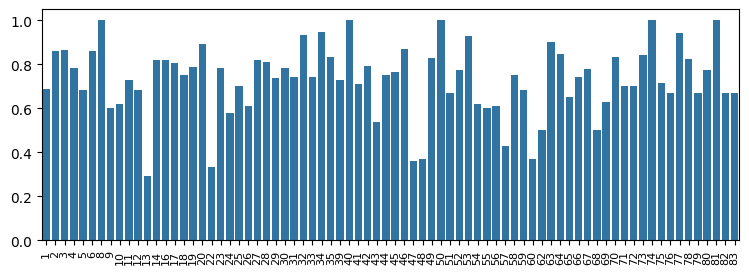

In [80]:
# As a proportion of the number of constructs as well ... 

theory_construct_lens = {k:len(t.constructs) for k,t in theories.items()}

theory_proportion_annot = [(k,v/theory_construct_lens[k]) for k,v in annot_nums]

theory_proportion_annot

print("Minimum",min([v for (k,v) in theory_proportion_annot]),"Mean",statistics.mean([v for (k,v) in theory_proportion_annot]))

plt.figure(figsize=(9, 3))
sns.barplot({k:v for (k,v) in theory_proportion_annot})
plt.xticks(rotation=90,fontsize=8)
plt.show()

#### Counts and interpretation of ontology annotation dataset

We look at the most common ontology annotations and visualise these 

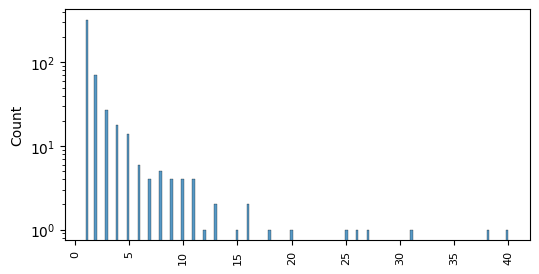

In [88]:
ontolabel_counts = {}

for (cid, count) in ontoid_counts.items():
    ciri = onto.get_iri_for_id(cid)
    if ciri: 
        clabel = onto.get_annotation(ciri, RDFSLABEL)
        #print(cid,ciri,clabel,count)
        if clabel:
            ontolabel_counts[cid+" "+clabel]=count
        else: 
            ontolabel_counts[cid]=count

plt.figure(figsize=(6, 3))
sns.histplot(ontoid_counts.values,log=True)
plt.xticks(rotation=90,fontsize=8)
plt.show()


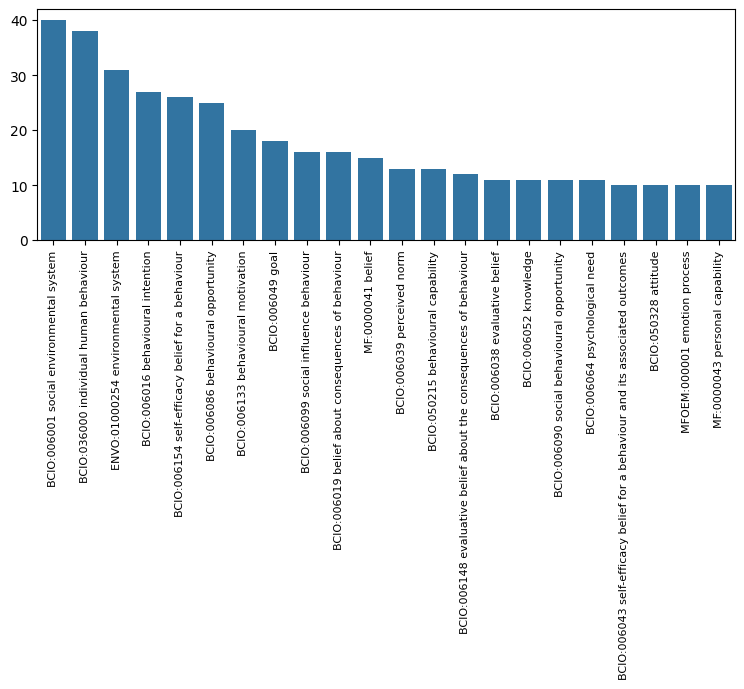

In [92]:
selected_ontocounts = {k:v for k,v in ontolabel_counts.items() if v>=10}

plt.figure(figsize=(9, 3))
sns.barplot(selected_ontocounts)
plt.xticks(rotation=90,fontsize=8)
plt.show()


#### Interpret the annotations
We have loaded the annotation dataset, the ontology and the theory dataset. Now we would like to use the annotations to integrate across theories. 

- Statistics for overlaps between theories based on common annotations
- Percentage containment as was previously reported based on lexical matching. Now using ontology annotations. This answers the research question "which theories are comparable"? i.e. which theories partially overlap by referring to the same entities? 
- Maximal set of compatible and consistent entities and relationships as a single "mega-theory"
- Weighting of statements based on how often they appear in different theories, what are the most common statements? Mega-theory by consensus (voting)? 





#### Overlaps between theories based on common annotations

We calculate how many common annotations are shared pairwise between each combination of theories . This gives us a measure for how overlapping each pair of theories is. 


In [110]:
#print(theory_annotations)

theories_in_order = list(theory_annotations.keys())
theories_in_order.sort(key = lambda x: int(x))

theory_annot_overlaps = {}

for t1 in theories_in_order: 
    results_t1 = {}
    for t2 in theories_in_order: 
        onto_ids_t1 = theory_annotations[t1]
        onto_ids_t2 = theory_annotations[t2]
        overlaps = [value for value in onto_ids_t1 if value in onto_ids_t2]
        results_t1[t2]=overlaps
    theory_annot_overlaps[t1]=results_t1

print(theory_annot_overlaps)


{'1': {'1': ['MFOEM:000001', 'MF:0000203', 'BCIO:050617', 'BCIO:007023', 'BCIO:050328', 'BCIO:006051', 'BCIO:006042', 'MF:0000045', 'BCIO:006086', 'BCIO:006096', 'BCIO:006063', 'BCIO:050817', 'MF:0000041', 'BCIO:006038', 'BCIO:050818', 'BCIO:050564', 'BCIO:006034', 'BCIO:050590', 'BCIO:006059', 'BCIO:050775', 'BCIO:006016', 'BCIO:050592'], '2': ['MFOEM:000001', 'BCIO:050328'], '3': ['BCIO:006042', 'BCIO:006096', 'BCIO:006059', 'BCIO:006016'], '4': ['BCIO:050328', 'BCIO:006086'], '5': ['BCIO:006086'], '6': [], '8': ['BCIO:006086'], '9': ['BCIO:006086'], '10': [], '11': ['BCIO:006086'], '12': ['BCIO:006086'], '13': [], '14': ['BCIO:006042', 'MF:0000041', 'BCIO:006038', 'BCIO:006016'], '16': [], '17': ['MFOEM:000001', 'BCIO:006096'], '18': ['BCIO:006016'], '19': [], '20': ['BCIO:006059'], '22': ['MF:0000045'], '23': ['BCIO:006063', 'BCIO:006016'], '24': ['BCIO:006042', 'BCIO:006016'], '25': ['BCIO:006086'], '26': [], '27': [], '28': ['MFOEM:000001', 'BCIO:006016'], '29': ['BCIO:050328', '

ValueError: Must pass 2-d input. shape=()

<Figure size 900x900 with 0 Axes>

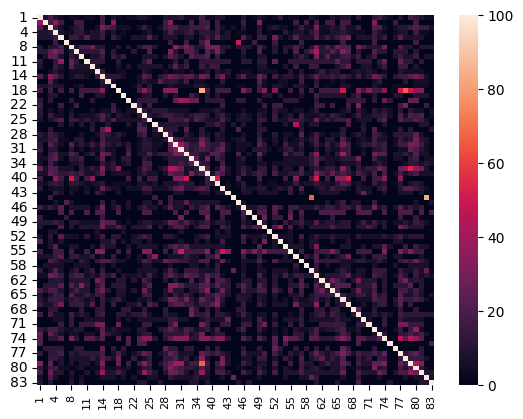

In [120]:
result_overlap_perc = []
annots_nums_dict = {k:v for (k,v) in annot_nums}

interesting_overlaps = {}

counter = 0
for t1 in theory_annot_overlaps:
    num_annots = annots_nums_dict[t1]
    result_overlap_perc.append([])
    for t2,overlaps in theory_annot_overlaps[t1].items():
        num_overlaps = len(overlaps)
        perc = num_overlaps / num_annots * 100
        result_overlap_perc[counter].append(perc)
        if perc < 100 and perc > 40:
            interesting_overlaps[t1+'-'+t2] = perc
    counter = counter+1

results_perc_overlap = pd.DataFrame(result_overlap_perc, theory_annot_overlaps.keys(),theory_annot_overlaps.keys())

results_perc_overlap


plt.figure()  # figsize=(9, 9)
sns.heatmap(results_perc_overlap)
plt.xticks(rotation=90,fontsize=8)
plt.show()

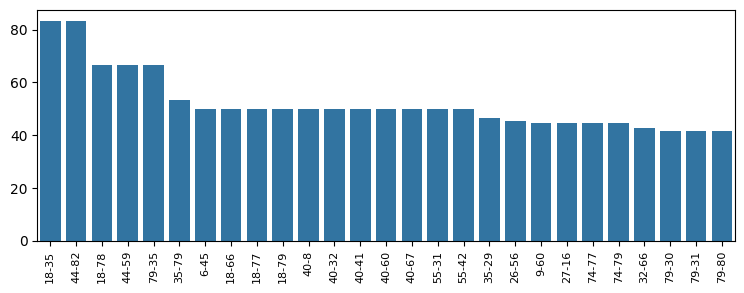

In [129]:
# Select just the higher ones...

interesting_overlaps_sorted = [ (k,v) for k,v in interesting_overlaps.items()]
interesting_overlaps_sorted.sort(reverse=True, key=lambda x: x[1])
interesting_overlaps_sorted

plt.figure(figsize=(9, 3))
sns.barplot({k:v for (k,v) in interesting_overlaps_sorted})
plt.xticks(rotation=90,fontsize=8)
plt.show()

#### Common Assertions

We collapse the theory assertions to triples using the ontology annotations rather than the construct labels. 
Then we look at how common the assertions are across different theories. 

In [143]:
annotated_triples = []

for theory_num, theory in theories.items():
    for triple in theory.triples:
        if triple.reified_rel is None: # Ignore the reified rels - too complex for this process now
            construct1 = triple.const1.name
            construct2 = triple.const2.name
            relationship = triple.relStr
            if 'relationship' not in construct1 and 'relationship' not in construct2:
                constr1_annots = list(resultdata.query(f"Theory_ID == {theory_num} and Construct == '{construct1.replace("'","").replace("\n","").strip()}'")['Ontology_ID'])
                constr2_annots = list(resultdata.query(f"Theory_ID == {theory_num} and Construct == '{construct2.replace("'","").replace("\n","").strip()}'")['Ontology_ID'])
                if len(constr1_annots)>0 and len(constr2_annots)>0: 
                    annot1 = constr1_annots[0]
                    annot2 = constr2_annots[0]
                    if annot1 != annot2: 
                        print("Theory",theory_num,"Construct1",construct1,"Annot1",annot1,"Rel",relationship,"Construct2",construct2,"Annot2",annot2)
                        annotated_triples.append( (annot1,relationship,annot2) )

annotated_triples

Theory 42 Construct1 Assessment and evaluation of responses Annot1 BCIO:006148 Rel Transitions to Construct2 Reassessment and redefinition of the situation Annot2 BCIO:050618
Theory 42 Construct1 Perception that need can be relieved by action Annot1 BCIO:050861 Rel Influences Construct2 Recognition of own ability to provide relief Annot2 BCIO:006043
Theory 42 Construct1 Assessment and evaluation of responses Annot1 BCIO:006148 Rel Part of Construct2 Assessment, evaluation and reassessment Annot2 BCIO:006038
Theory 42 Construct1 Reassessment and redefinition of the situation Annot1 BCIO:050618 Rel Part of Construct2 Assessment, evaluation and reassessment Annot2 BCIO:006038
Theory 42 Construct1 Costs and benefits Annot1 BCIO:050649 Rel Part of Construct2 Assessment and evaluation of responses Annot2 BCIO:006148
Theory 42 Construct1 Moral Annot1 BCIO:006019 Rel Type of Construct2 Costs and benefits Annot2 BCIO:050649
Theory 42 Construct1 Physical Annot1 BCIO:006019 Rel Type of Construct2

[('BCIO:006148', 'Transitions to', 'BCIO:050618'),
 ('BCIO:050861', 'Influences', 'BCIO:006043'),
 ('BCIO:006148', 'Part of', 'BCIO:006038'),
 ('BCIO:050618', 'Part of', 'BCIO:006038'),
 ('BCIO:050649', 'Part of', 'BCIO:006148'),
 ('BCIO:006019', 'Type of', 'BCIO:050649'),
 ('BCIO:006019', 'Type of', 'BCIO:050649'),
 ('BCIO:006149', 'Type of', 'BCIO:050649'),
 ('BCIO:050858', 'Part of', 'BCIO:050618'),
 ('BCIO:050857', 'Part of', 'BCIO:050618'),
 ('BCIO:050856', 'Part of', 'BCIO:050618'),
 ('BCIO:050328', 'Influences', 'BCIO:006047'),
 ('BCIO:050827', 'Influences', 'BCIO:006004'),
 ('GO:0098596', 'Influences', 'BCIO:036000'),
 ('BCIO:006133', 'Influences', 'BCIO:036000'),
 ('BCIO:006123', 'Transitions to', 'BCIO:050838'),
 ('BCIO:050838', 'Influences', 'BCIO:036000'),
 ('BCIO:006121', 'Influences', 'BCIO:050578'),
 ('BCIO:006124', 'Influences', 'BCIO:050578'),
 ('BCIO:007252', 'Influences', 'BCIO:050756'),
 ('BCIO:006123', 'Negatively influences', 'BCIO:036000'),
 ('BCIO:050838', 'Posi

In [144]:
from collections import Counter

cnt = Counter(annotated_triples)

cnt

Counter({('BCIO:006125', 'Type of', 'BCIO:050684'): 5,
         ('BCIO:006133', 'Influences', 'BCIO:036000'): 3,
         ('MFOEM:000001', 'Type of', 'MFOEM:000195'): 3,
         ('BCIO:006016', 'Influences', 'BCIO:036000'): 3,
         ('BCIO:036000', 'Influences', 'ENVO:01000254'): 3,
         ('BCIO:006019', 'Type of', 'BCIO:050649'): 2,
         ('BCIO:006059', 'Influences (*)', 'BCIO:006042'): 2,
         ('BCIO:006043', 'Positively influences', 'BCIO:006016'): 2,
         ('BCIO:006062', 'Part of', 'BCIO:006005'): 2,
         ('BCIO:050603', 'Part of', 'BCIO:007012'): 2,
         ('ENVO:01000254', 'Influences', 'BCIO:006086'): 2,
         ('BCIO:006002', 'Part of', 'MF:0000032'): 2,
         ('BCIO:006016', 'Part of', 'ADDICTO:0000399'): 2,
         ('BCIO:006001', 'Part of', 'ENVO:01000254'): 2,
         ('BCIO:006001', 'Type of', 'MF:0000040'): 2,
         ('MF:0000041', 'Influences', 'ADDICTO:0001135'): 2,
         ('BCIO:050215', 'Influences', 'BCIO:036000'): 2,
         ('BC

In [161]:
for a,c in cnt.items():
    if c >= 3: 
        (a1,rel,a2) = a
        a1iri = onto.get_iri_for_id(a1)
        a2iri = onto.get_iri_for_id(a2)
        a1label = onto.get_annotation(a1iri, RDFSLABEL)
        a2label = onto.get_annotation(a2iri, RDFSLABEL)
        print(a1label, rel, a2label, c)
        

behavioural motivation Influences individual human behaviour 3
emotion process Type of affective process 3
behavioural intention Influences individual human behaviour 3
individual human behaviour Influences environmental system 3
operant conditioning Type of intermittent schedule of reinforcement 5


#### Generate a diagram for an integrated set of theory expressions

We generate a diagram representing an "overarching" integrated set of theory expressions


In [150]:
! pip install networkx
! pip install pydot
! pip install graphviz

In [155]:
import networkx as nx

def wrap_if_needed(string_val):
    if ":" in string_val:
        return( f'"{string_val}"')
    return(string_val)

G=nx.DiGraph()

for (a1,rel,a2) in annotated_triples:
    if cnt[(a1,rel,a2)]>1:    
        a1iri = onto.get_iri_for_id(a1)
        a2iri = onto.get_iri_for_id(a2)
        a1label = onto.get_annotation(a1iri, RDFSLABEL)
        a2label = onto.get_annotation(a2iri, RDFSLABEL)
        if a1label is None or a2label is None: 
            continue
        
        G.add_node(wrap_if_needed(a1label))
        G.add_node(wrap_if_needed(a2label))
        G.add_edge(wrap_if_needed(a1label),wrap_if_needed(a2label),label=rel)
    
pdot = nx.drawing.nx_pydot.to_pydot(G)

for i, node in enumerate(pdot.get_nodes()):
    node_name = str(node).replace("\"","").replace(";","")
    node.set_shape('box')
    node.set_fontcolor('black')
    node.set_fillcolor('white')
    node.set_style('rounded, filled')
    node.set_color('black')

png_path = "merged-large.png"
pdot.write_png(png_path)